In [ ]:
import time

from simulator import *
from algorithms import *
from algorithms_2 import *
from MCTS import *

In [1]:
lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............

"""

In [ ]:
map = make_map(map_str=lava_maze, n_apples=5, seed=18)
print(map)

In [ ]:
env = create_env(map, apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()

In [ ]:
# A star with bonus to tiles that have apples nearby
simulate_with_heuristic(env, a_star_apple, h=manhattan_distance, apple_bonus=3)

In [ ]:
# A* with modified heuristic that considers the distance to apples then stairs
simulate_with_heuristic(env, a_star_collect_apples, weight=1)

In [ ]:
# Monte Carlo with Random
simulate_with_heuristic(
    env, mcts, iterations=50000
)

In [ ]:
# Monte Carlo Tree Search with heuristic
simulate_with_heuristic(
    env, mcts, iterations=50000, policy=heuristic_rollout_policy,
)

In [ ]:
# Beam Search
simulate_with_heuristic(
    env, beam_search_path_planner, apple_reward=7.5,
    beam_width=5
)

In [ ]:
# Potential fields
simulate_with_heuristic(
    env, potential_field_path
)

In [ ]:
simulate_with_heuristic(
    env, greedy_best_first_search
)

In [ ]:
from MCTS_2 import mcts

mcts = simulate_with_heuristic(env, mcts,
                               iterations=10000,
                               heuristic=None,  # Using cached BFS as heuristic
                               )

# Online Pathfinding Algorithms

In [2]:
from algorithms_online import *
from simulator import create_env, make_map, simulate_online
from simulator import *

lava_maze = """
-----------------
|..L....L....L..|
|..L..LLL..L.LL.|
|..L..L.......L.|
|.....L.....L...|
|..L....L....L..|
|..LLL..L.LLLL..|
|..L.L..L..L....|
|..L....L....L..|
|.....L.....L...|
-----------------
"""

simple_room = """
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
"""

simple_maze = """
||||||||||||||||||||||
|....................|
|..|||||.....|..|....|
|..|   |...||||||||..|
|..||| |........|....|
|.....| |||||||.|||..|
|.....|       |.|....|
|.....|       |......|
|||||||  ||||||......|
         |.......|...|
         |.......|||.|
         |...........|
         |||||||||||||
"""

In [ ]:
env = create_env(make_map(lava_maze, 5), apple_reward=0.75, penalty_time=-0.1)
env.reset()
env.render()

In [ ]:
simulate_online(env, a_star_online)

In [42]:
map = make_map(simple_maze, 5, seed=time.time(), start=[(3, 6), (4, 7)], stairs=(11, 10))

Placing 5 apples between (1, 2) and (21, 11)
Placed apple at: (8, 4)
Placed apple at: (15, 2)
Placed apple at: (6, 2)
Placed apple at: (10, 4)
Placed apple at: (7, 2)


In [43]:
print(map)


MAZE: "mylevel", ' '
FLAGS:premapped
INIT_MAP: solidfill,' '
GEOMETRY:center,center
MAP
||||||||||||||||||||||
|....................|
|..|||||.....|..|....|
|..|   |...||||||||..|
|..||| |........|....|
|.....| |||||||.|||..|
|.....|       |.|....|
|.....|       |......|
|||||||  ||||||......|
         |.......|...|
         |.......|||.|
         |...........|
         |||||||||||||
ENDMAP
REGION:(0,0,22,13),lit,"ordinary"
BRANCH:(3,6,4,7),(0,0,0,0)
OBJECT:('%',"apple"),(8, 4)
OBJECT:('%',"apple"),(15, 2)
OBJECT:('%',"apple"),(6, 2)
OBJECT:('%',"apple"),(10, 4)
OBJECT:('%',"apple"),(7, 2)
STAIR:(11, 10),down



In [44]:
env = create_env(map, apple_reward=1.5)
env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                            ----------------------                              
                            |....................|                              
                            |..-----.....|..|....|                              
                            |..|   |...--------..|                              
                            |..--- |........|....|                              
                            |.....| -------.|--..|                              
                           


It's a wall.                                                                    
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                            ----------------------                              
                            |.....@..............|                              
                            |..---%%.....|..|....|                              
                            |..|   |...--------..|                              
                            |..--- |........|....|                              
                            |.....| -------.|--..|                              
                           

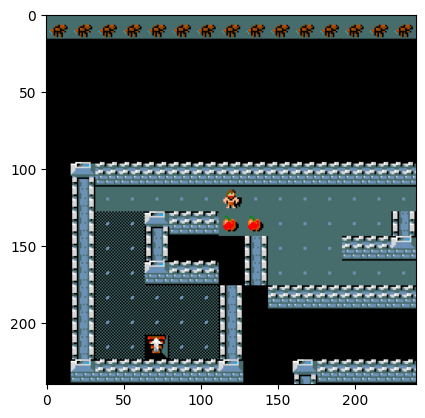

In [60]:
state, action, reward, next_state, done = env.step(2)
plt.imshow(state['pixel_crop'])
env.render()

In [ ]:
simulate_online(env, montecarlo_online, wait_time=0.5, clear_outputs=True, cropped=True, iterations=10000)

In [ ]:
simulate_online(env, montecarlo_online, wait_time=0.5, clear_outputs=True, cropped=True, iterations=10000,
                heuristic=cached_bfs)

In [ ]:
simulate_online(env, beam_search_online, wait_time=0.5, clear_outputs=True, cropped=True,
                beam_width=5)